# Régression Linéaire sklearn

Emmanuel Evilafo
https://evilafo.xyz/



In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [33]:
# Importer le dataset "taxis" de seaborn
taxis = sns.load_dataset("taxis")
# Afficher les 5 premières lignes du dataset comme d'habitude
taxis.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [34]:
# Sélectionner les colonnes pertinentes pour l'analyse
# 'distance', 'fare', 'tip', 'total', 'tolls'
taxis = taxis[['distance','fare','tip','total','tolls']]

# Supprimer les lignes contenant des valeurs manquantes (NaN)
taxis = taxis.dropna()
# Afficher les 5 premières lignes du dataset nettoyé
taxis.head(5)

,distance,fare,tip,total,tolls
0,1.60,7.0,2.15,12.95,0.0
1,0.79,5.0,0.00,9.30,0.0
2,1.37,7.5,2.36,14.16,0.0
3,7.70,27.0,6.15,36.95,0.0
4,2.16,9.0,1.10,13.40,0.0


In [35]:
# Définir les variables explicatives (X) et la variable cible (y)
# X contient 'distance', 'fare', 'tip', 'tolls'
# y contient 'total'
X = taxis[['distance','fare','tip','tolls']]
y = taxis['total']

In [36]:
# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
# random_state=42 pour assurer la reproductibilité des résultats
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=42)

In [37]:
# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train,y_train)

LinearRegression()

In [39]:
# Afficher les coefficients du modèle (pente pour chaque variable)
print("Coéficients : ", model.coef_)
# Afficher l'ordonnée à l'origine du modèle
print("L'ordonnée à l'origine : ",model.intercept_)

Coéficients :  [-0.02874172  0.97680877  1.18264866  1.0328708 ]
L'ordonnée à l'origine :  3.1359549816488066


In [45]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [46]:
# Les métriques d'évaluation
# L'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
#Racine de l'Erreur Quadratique Moyenne
rmse = np.sqrt(mse)
#R² (Coefficient de Détermination
r2 = r2_score(y_test, y_pred)

# Afficher les métriques
print(f"MSE (Erreur Quadratique Moyenne): {mse:.2f}")
print(f"RMSE (Racine de l'Erreur Quadratique Moyenne): {rmse:.2f}")
print(f"R² (Coefficient de Détermination): {r2:.2f}")

MSE (Erreur Quadratique Moyenne): 1.11
RMSE (Racine de l'Erreur Quadratique Moyenne): 1.05
R² (Coefficient de Détermination): 0.99


In [69]:
# Les coefficients du modèle
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})
print("\nCoefficients du modèle:")
print(coefficients)


Coefficients du modèle:
   Variable  Coefficient
0  distance    -0.028742
1      fare     0.976809
2       tip     1.182649
3     tolls     1.032871


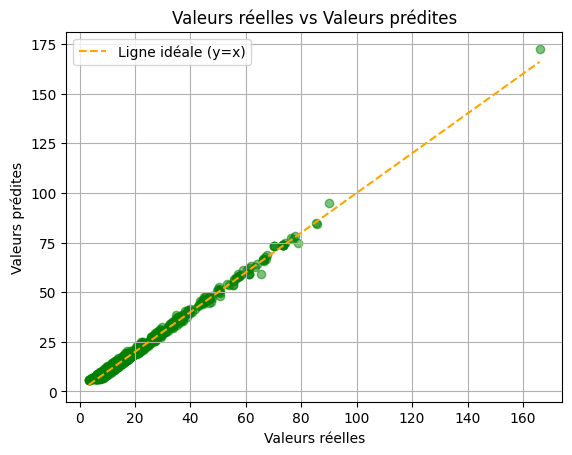

In [74]:
# Nuage de points pour visualiser les prédictions vs. les valeurs réelles
plt.scatter(y_test, y_pred, alpha=0.5, c='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label="Ligne idéale (y=x)")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs réelles vs Valeurs prédites")
plt.legend()
plt.grid(True)
plt.show()

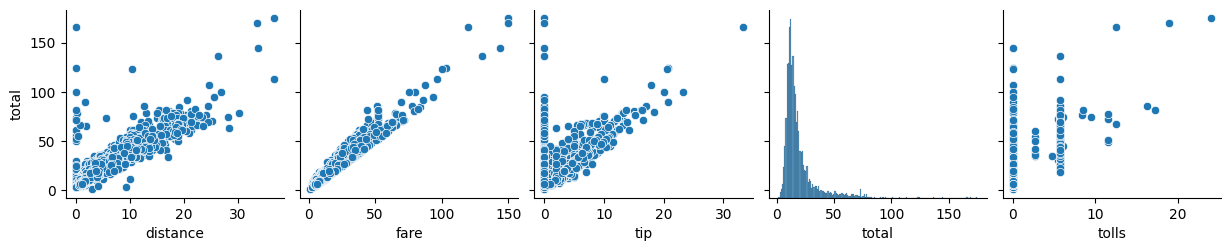

In [43]:
# Matrice de nuages de points pour visualiser les relations entre les variables et la variable "total"
sns.pairplot(taxis, y_vars="total")